# Overfitting and resolving overfitting

Overfitting

How to resolve it:

  Cross validation
      
      K fold cross validation
      
  Regularisation:
     
     Lasso
     
     Ridge
     
     Elastic Net

Overfitting:

  Phenomenon where the model gives lower training error, but higher testing error.
  
  
  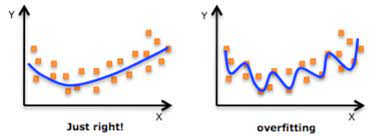


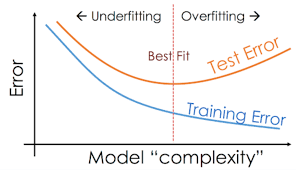

## Sourcing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ad=pd.read_csv('Advertising.csv')
ad

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## preprocessing

In [3]:
ad=ad.drop(['Unnamed: 0'],axis=1)

In [4]:
ad

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
# Feature set

X=ad.drop(['Sales'],axis=1)
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [6]:
# Target
y=ad['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

### Standardisation of feature set

In [7]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

## Splitting into train and test

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=10)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

## Model building - LR

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

## Analysing the performance

In [10]:
from sklearn.metrics import r2_score,mean_squared_error

# Training performance 

r2_train=r2_score(y_train,lr.predict(X_train))

mse_train=mean_squared_error(y_train,lr.predict(X_train))

print(' Training data analysis')
print(' R2 score - train:', r2_train)
print(' MSE - train:',mse_train)

# Test performance 

r2_test=r2_score(y_test,lr.predict(X_test))

mse_test=mean_squared_error(y_test,lr.predict(X_test))

print(' Test data analysis')
print(' R2 score - test:', r2_test)
print(' MSE - test:',mse_test)



 Training data analysis
 R2 score - train: 0.9209087553499528
 MSE - train: 1.8585966709492503
 Test data analysis
 R2 score - test: 0.8353672324670594
 MSE - test: 6.700486756528875


Remark:

This sis an instance of overfitting

## Resolving overfitting

 Cross validation
 
   K- fold cross validation
   
   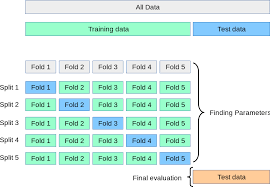

n= # of training data

if k=1,  normal training

k=2,3,4,.....n-1

k=n, leave One Out Cross Validation (LOOCV)

k is a hyper parameter

## LR with cross validation

In [11]:
lr=LinearRegression()

from sklearn.model_selection import cross_val_score, cross_val_predict


In [13]:
cv_score_train=cross_val_score(lr,X_train,y_train,cv=5)

print('CV_score - training:',cv_score_train)

CV_score - training: [0.92009437 0.90119987 0.90916145 0.92654738 0.92166077]


In [14]:
print(' The CV- score of training:',cv_score_train.mean())

 The CV- score of training: 0.9157327701186169


In [15]:
# cv=4
cv_score_train=cross_val_score(lr,X_train,y_train,cv=4)

print('CV_score - training:',cv_score_train)
print(' The CV- score of training:',cv_score_train.mean())

CV_score - training: [0.90318963 0.9030216  0.93983595 0.91827199]
 The CV- score of training: 0.9160797935293802


In [16]:
# cv=3
cv_score_train=cross_val_score(lr,X_train,y_train,cv=3)

print('CV_score - training:',cv_score_train)
print(' The CV- score of training:',cv_score_train.mean())

CV_score - training: [0.90904216 0.92013056 0.9255209 ]
 The CV- score of training: 0.9182312082542176


In [17]:
# cv=2
cv_score_train=cross_val_score(lr,X_train,y_train,cv=2)

print('CV_score - training:',cv_score_train)
print(' The CV- score of training:',cv_score_train.mean())

CV_score - training: [0.9080034  0.92991518]
 The CV- score of training: 0.918959291258261


In [18]:
# cv=1
cv_score_train=cross_val_score(lr,X_train,y_train,cv=1)

print('CV_score - training:',cv_score_train)
print(' The CV- score of training:',cv_score_train.mean())

ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

In [19]:
# cv=10
cv_score_train=cross_val_score(lr,X_train,y_train,cv=10)

print('CV_score - training:',cv_score_train)
print(' The CV- score of training:',cv_score_train.mean())

CV_score - training: [0.89460976 0.93950986 0.80333388 0.94414693 0.8591572  0.92865633
 0.93605667 0.91725888 0.89502386 0.94632849]
 The CV- score of training: 0.9064081863045436


In [20]:
# Choose cv= 3 as the value

# Use this for predicting purpose

y_pred=cross_val_predict(lr, X_test,y_test,cv=3)
y_pred

array([16.69812691, 13.77294838, 18.68652929, 24.70832629, 20.41825367,
       13.26993187, 14.4217984 , 21.86149324, 20.27040927, 13.38669332,
       24.37495037,  6.65045497, 13.87964762, 19.05256276, 17.9246288 ,
       14.32047367, 20.48140766, 10.11716933, 21.63438514, 21.72363756,
       16.1253366 , 12.0547364 , 22.31567978, 14.98667724, 17.2923942 ,
        7.35500235, 12.98380294,  9.99191968, 22.40667304,  4.87314157,
       11.70341491, 21.0898296 ,  2.14747765,  2.28387402, 18.95228016,
       17.86677142,  5.08108469, 19.67787454,  7.59493555, 14.59240111])

In [21]:
y_test

59     18.4
5       7.2
20     18.0
198    25.5
52     22.6
19     14.6
162    14.9
55     23.7
69     22.3
2       9.3
98     25.4
10      8.6
75      8.7
142    20.1
124    19.7
63     14.0
109    19.8
78      5.3
111    21.8
185    22.6
154    15.6
130     1.6
61     24.2
87     16.0
102    14.8
121     7.0
136     9.5
1      10.4
47     23.2
172     7.6
159    12.9
39     21.5
76      6.9
91      7.3
35     12.8
178    11.8
127     8.8
169    15.0
46     10.6
174    11.5
Name: Sales, dtype: float64

## Regularisation for LR

### Lasso

In [25]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
r2_lasso_train=r2_score(y_train, lasso.predict(X_train))
r2_lasso_test=r2_score(y_test, lasso.predict(X_test))

mse_lasso_train=mean_squared_error(y_train, lasso.predict(X_train))
mse_lasso_test=mean_squared_error(y_test, lasso.predict(X_test))

print('R2- Lasso- Train:', r2_lasso_train)
print('R2- Lasso- Test:', r2_lasso_test)

print('MSE- Lasso - Train', mse_lasso_train)
print('MSE- Lasso - Test', mse_lasso_test)


R2- Lasso- Train: 0.9199573974585257
R2- Lasso- Test: 0.8319851097741227
MSE- Lasso - Train 1.8809530090965556
MSE- Lasso - Test 6.8381377761440545


## Ridge

In [26]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
r2_ridge_train=r2_score(y_train, ridge.predict(X_train))
r2_ridge_test=r2_score(y_test, ridge.predict(X_test))

mse_ridge_train=mean_squared_error(y_train, ridge.predict(X_train))
mse_ridge_test=mean_squared_error(y_test, ridge.predict(X_test))

print('R2- ridge- Train:', r2_ridge_train)
print('R2- ridge- Test:', r2_ridge_test)

print('MSE- ridge - Train', mse_ridge_train)
print('MSE- Ridge - Test', mse_ridge_test)

R2- ridge- Train: 0.9209083458884119
R2- ridge- Test: 0.8352944314323737
MSE- ridge - Train 1.8586062930491445
MSE- Ridge - Test 6.70344972906516


# Elastic Net

In [27]:
from sklearn.linear_model import ElasticNet

net=ElasticNet()
net.fit(X_train, y_train)
r2_net_train=r2_score(y_train, net.predict(X_train))
r2_net_test=r2_score(y_test, net.predict(X_test))

mse_net_train=mean_squared_error(y_train, net.predict(X_train))
mse_net_test=mean_squared_error(y_test, net.predict(X_test))

print('R2- net  Train:', r2_net_train)
print('R2- net- Test:', r2_net_test)

print('MSE- net - Train', mse_net_train)
print('MSE- net - Test', mse_net_test)

R2- net  Train: 0.7431344504513608
R2- net- Test: 0.643247265959083
MSE- net - Train 6.036185893710871
MSE- net - Test 14.519691344667118
